# Predicting Home Prices in Banglore

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df1=pd.read_csv(r"C:\Users\Mohd Shareeq\Downloads\Bengaluru_House_Data.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

#### now we r droping columns which r not required for the prediction 
#####  like this [area_type	, availability	, location] 	

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

## now lets d o the data cleaning  remove the null values

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()    # we droped that rows which has null values 
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### making better input data for the model.

# Feature Engineering

#### Converting categorical value into numeric SIZE is a categorical converting into numeric
#### by using Lambda function

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['BHK'] = df3['size'].apply(lambda x:int(x.split(' ') [0]))
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
df3.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
df3['total_sqft'].dtype


dtype('O')

## Explore total_sqft feature

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)



,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
df3['total_sqft'].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [18]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [19]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [20]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [21]:
(2100+2850)/2

2475.0

## ones more feature engineering 

#### Add new feature called price per square feet

In [22]:
# Total price lies. Per-sqft tells the truth.
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

##### we have already droped this (['area_type','availability','location','society'],axis='columns')

## Regression models don’t work with raw text. They require numerical features.
## Text isn’t “bad”; raw text must be encoded (one-hot, label encoding, embeddings).No raw text. Only numbers — after proper encoding.

In [24]:
location_stats = df5['location'].value_counts(ascending=False)
location_stats


location
Whitefield                         532
Sarjapur  Road                     392
Electronic City                    302
Kanakpura Road                     264
Thanisandra                        232
                                  ... 
beml layout, basaveshwara nagar      1
Sadhguru Layout                      1
Chikbasavanapura                     1
Electronic City Phase 1,             1
Chuchangatta Colony                  1
Name: count, Length: 1298, dtype: int64

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                      10
Basapura                           10
Gunjur Palya                       10
Naganathapura                      10
Ganga Nagar                        10
                                   ..
beml layout, basaveshwara nagar     1
Sadhguru Layout                     1
Chikbasavanapura                    1
Electronic City Phase 1,            1
Chuchangatta Colony                 1
Name: count, Length: 1058, dtype: int64

In [26]:
len(df5.location.unique())

1298

In [27]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [28]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [29]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [30]:
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [31]:
df5.shape

(13200, 7)

## removing outliers 

In [32]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)]
df6.shape


(12456, 7)

In [33]:
df6

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [34]:
df6.price_per_sqft.describe()




#The maximum price per square foot is ₹176,470, which is extremely high compared to the average and indicates outliers.

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def remove_pps_outliers(df):
    def filter_group(subdf):
        m = subdf.price_per_sqft.mean()
        st = subdf.price_per_sqft.std(ddof=0)  # SAME as np.std
        return subdf[(subdf.price_per_sqft > m - st) &(subdf.price_per_sqft <= m + st)]

    return df.groupby('location', group_keys=False).apply(filter_group)

# apply
df7 = remove_pps_outliers(df6)

# check result
df7.shape


(10245, 7)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [36]:
def remove_pps_outliers(df):
    return df.groupby('location', group_keys=False).apply(
        lambda x: x[(x.price_per_sqft > x.price_per_sqft.mean() - x.price_per_sqft.std()) &
            (x.price_per_sqft <= x.price_per_sqft.mean() + x.price_per_sqft.std())])

##  We keep only normal values (within mean ± std).
    
df7 = remove_pps_outliers(df6)
df7.shape


(10295, 7)

In [37]:
df7

,location,size,total_sqft,bath,price,BHK,price_per_sqft
152,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000
341,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2474,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
5030,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
5771,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...
13285,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


### now finding the outlines in the cleaned data 

In [38]:
bhk_means = df7.groupby(['location', 'BHK'])['price_per_sqft'].mean().unstack()
bhk_means

BHK,1,2,3,4,5,6,7,8,9,10,11,13,16
location,,,,,,,,,,,,,
Devarachikkanahalli,NaN,4278.151140,4404.028994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st Block Jayanagar,NaN,11983.805668,11756.169052,15018.711280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st Phase JP Nagar,5952.380952,7931.806800,9151.192152,7537.922181,5666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Phase Judicial Layout,NaN,3851.851852,3620.939917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Stage Nagarbhavi,NaN,NaN,NaN,15891.203704,NaN,16891.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yelahanka,5250.754433,4885.500092,5137.394034,5446.394350,5150.000000,5555.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yelahanka New Town,3711.071162,5255.289619,5244.832859,5202.863962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yelenahalli,NaN,3878.617021,3918.945707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Create mask: 3BHK cheaper than 2BHK (location-wise)
outlier_name = (df7['BHK'] == 3) & (df7['price_per_sqft'] < df7['location'].map(bhk_means[2]))

# I avoided using a global average because property prices are location-dependent,so I used location-wise
# averages ""mapped"" back to each row.

# Count outliers
outlier_count = outlier_name.sum()

print("Total number of outliers:", outlier_count)


Total number of outliers: 1671


In [40]:
# Get all the outlier rows again
outlier_rows = df7[outlier_name]

# Now count how many times each location appears in the outliers
location_outlier_counts = outlier_rows['location'].value_counts(ascending=False)

# Print the location names and their outlier counts
print(location_outlier_counts)


location
other             386
Whitefield         63
Kanakpura Road     60
Uttarahalli        47
Sarjapur  Road     42
                 ... 
Shampura            1
Sonnenahalli        1
Sultan Palaya       1
Varthur Road        1
Yelachenahalli      1
Name: count, Length: 199, dtype: int64


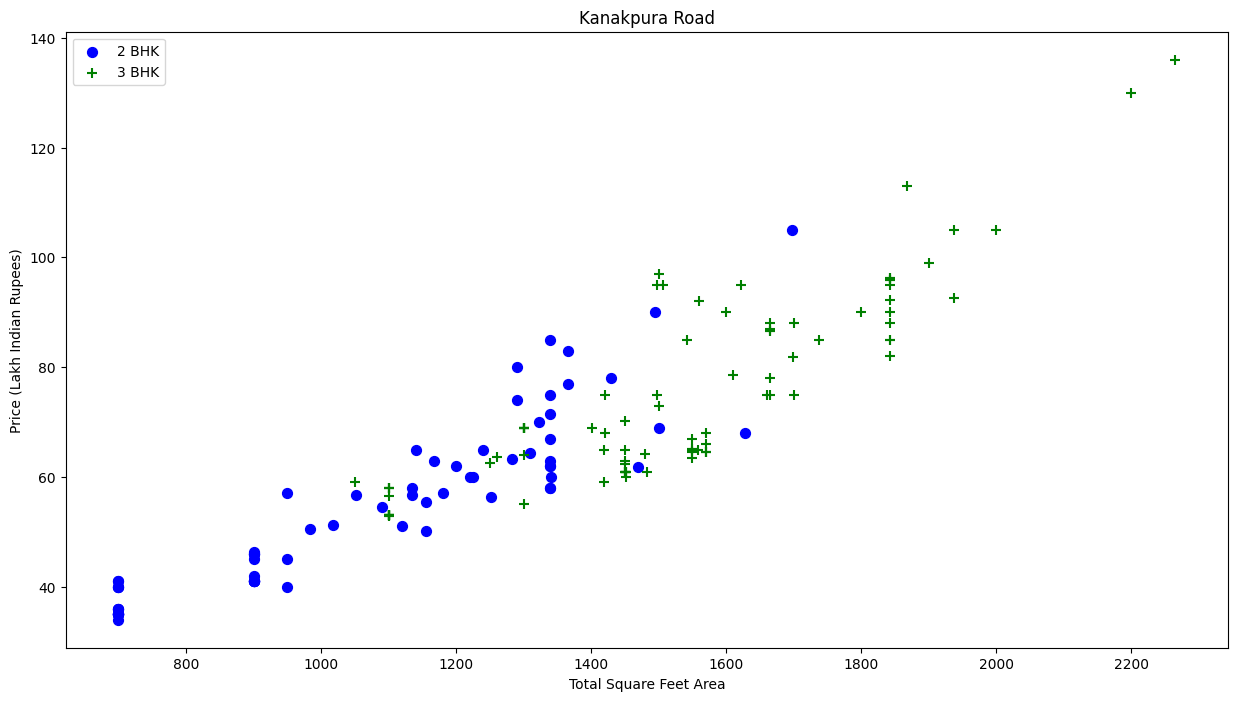

In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.BHK==2)  & (df.location==location)] 
    bhk3 = df[ (df.BHK==3) &  (df.location==location) ]
    
    plt.figure(figsize=(15,8))

    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Kanakpura Road")

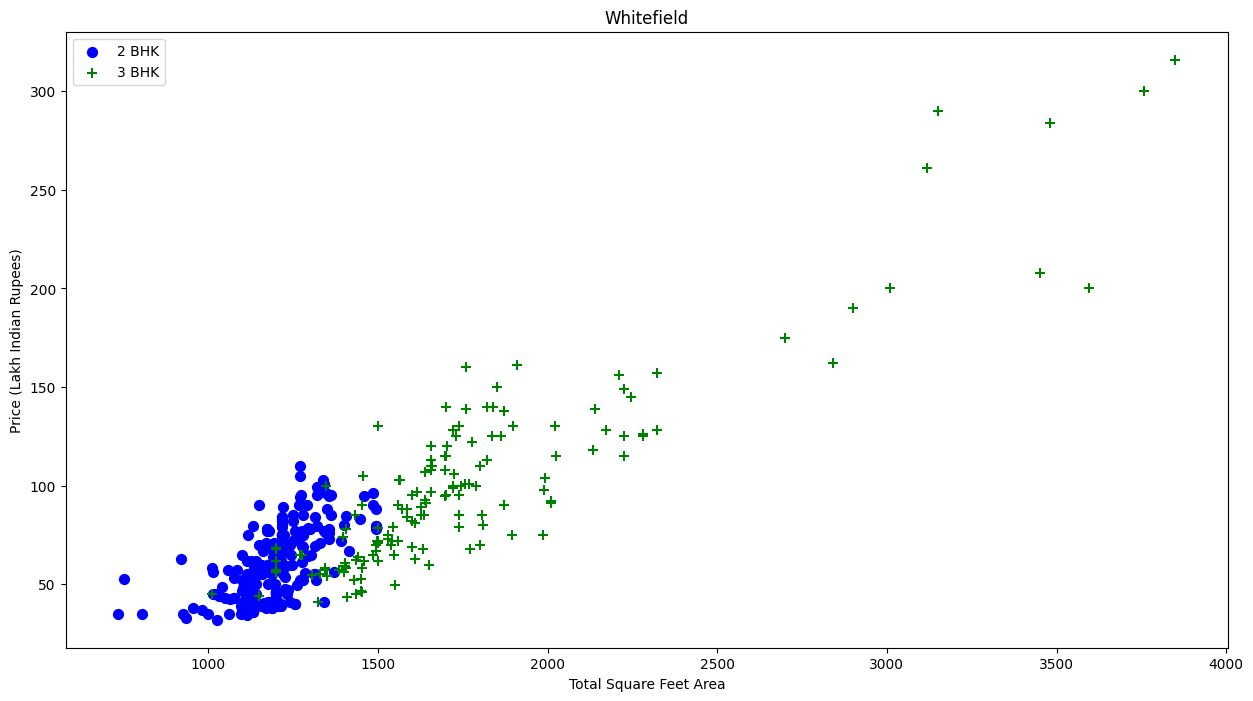

In [42]:
plot_scatter_chart(df7,"Whitefield")

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7377, 7)

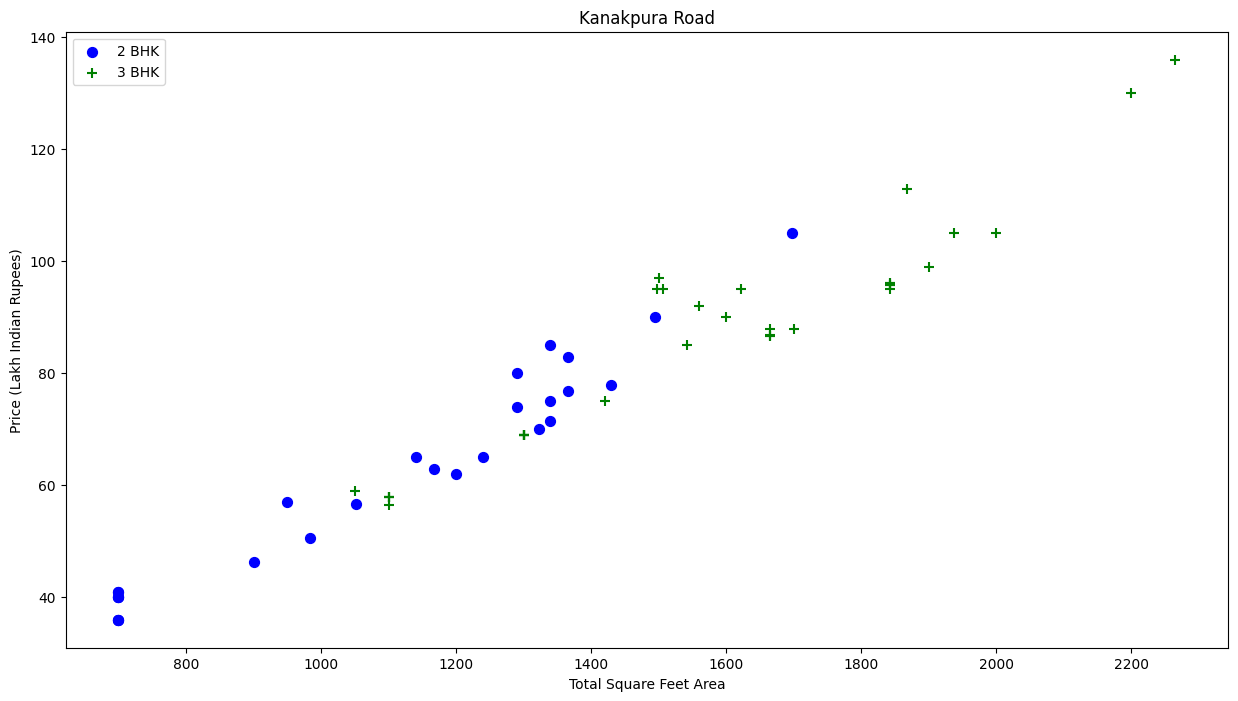

In [44]:
plot_scatter_chart(df8,"Kanakpura Road")

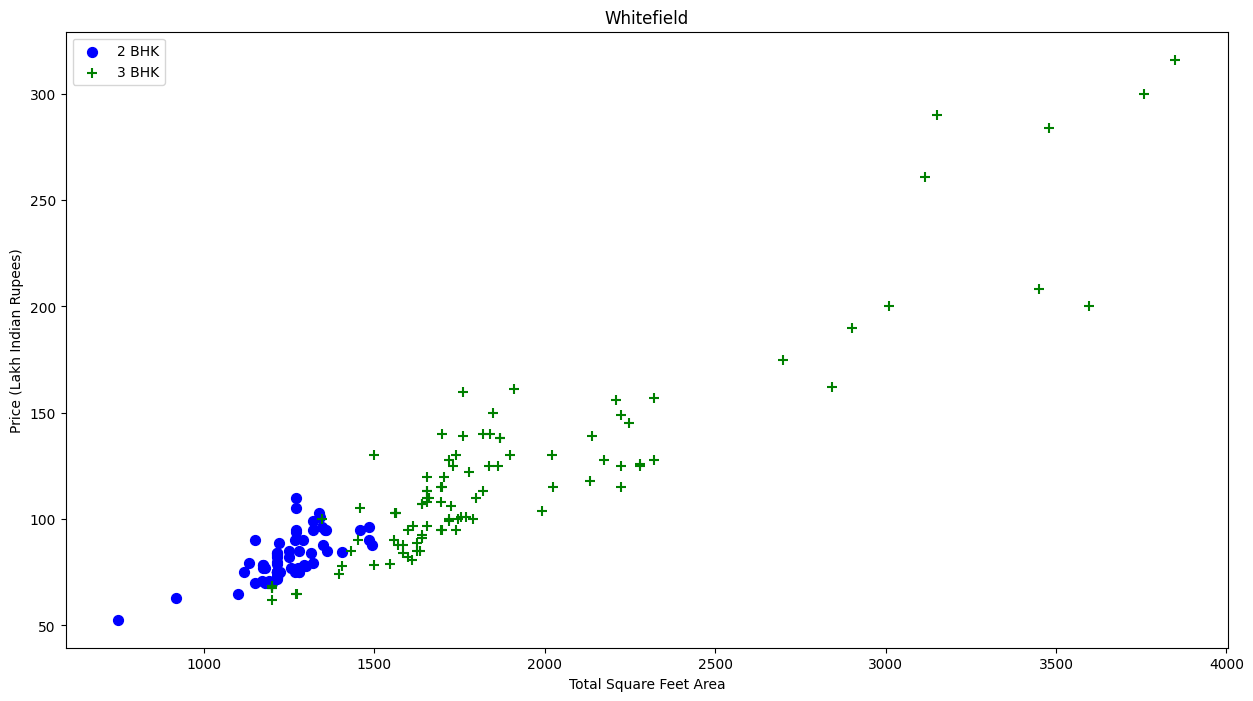

In [45]:
plot_scatter_chart(df8,"Whitefield")

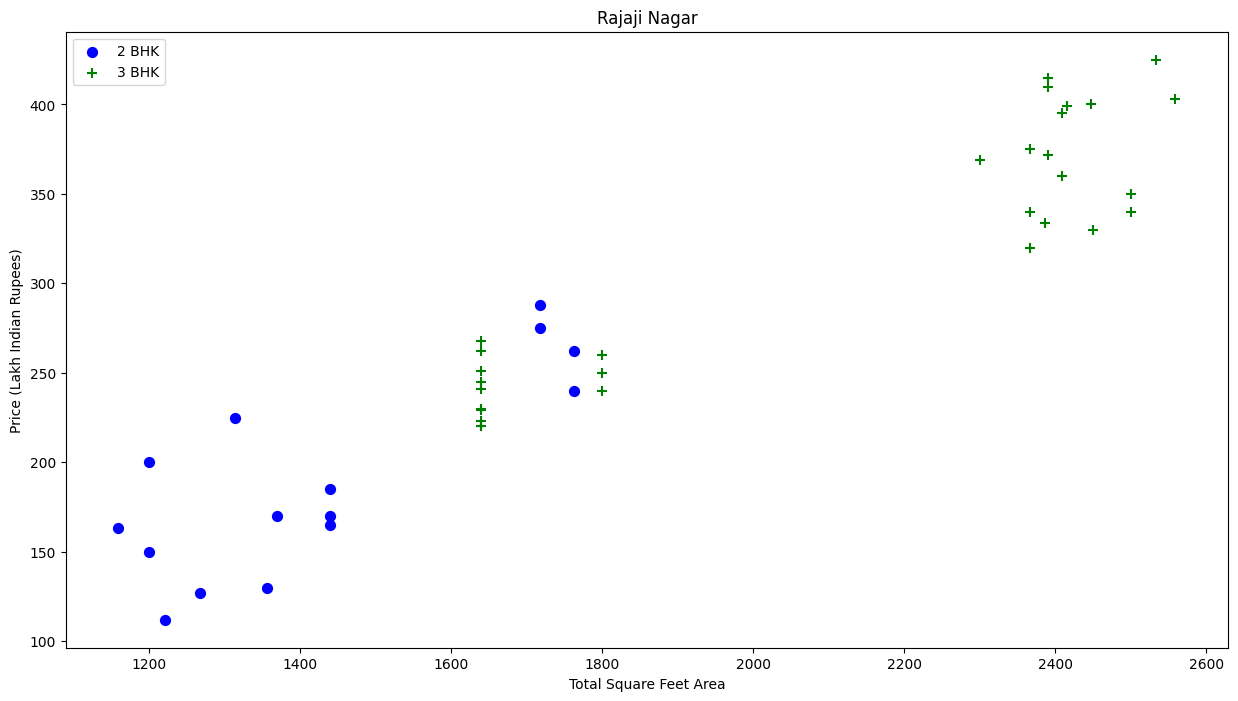

In [46]:
plot_scatter_chart(df8,"Rajaji Nagar")

  # now there is no outliers and wrong values 

Text(0, 0.5, 'Count')

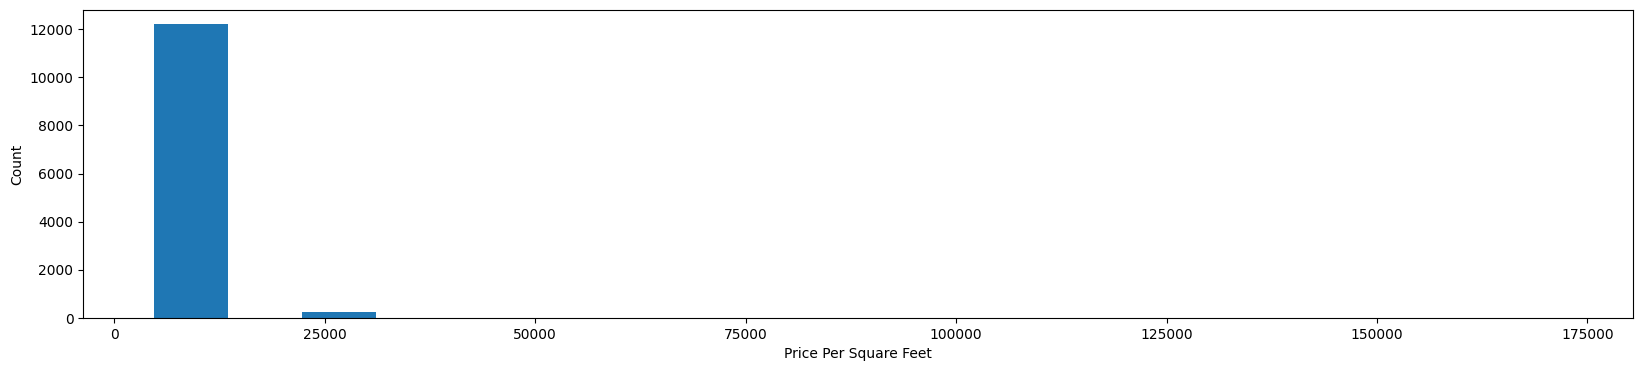

In [47]:
## before 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,4)
plt.hist(df6.price_per_sqft,rwidth=0.5)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

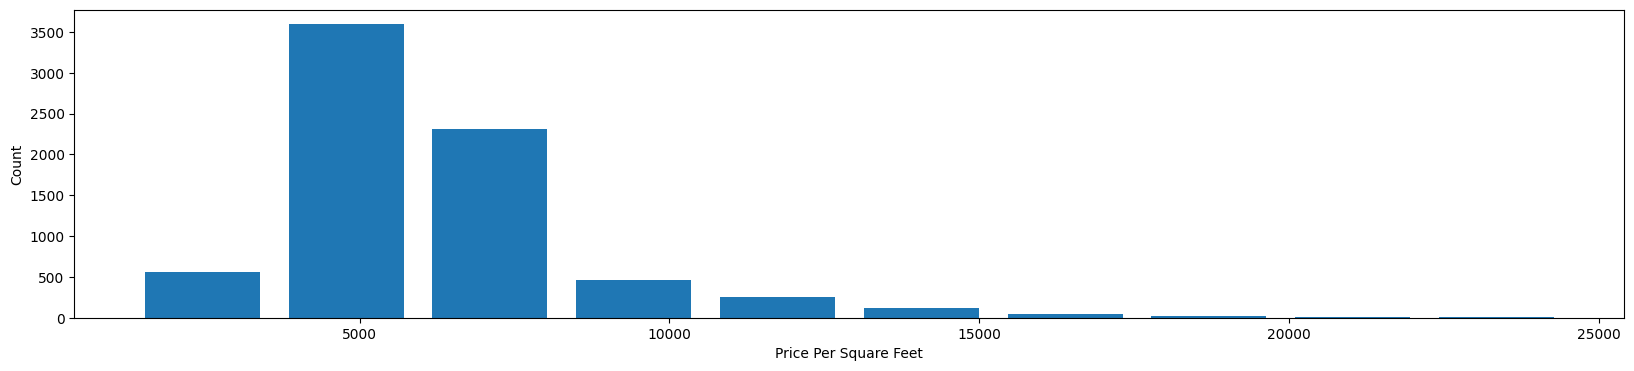

In [48]:
# After
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,4)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature

In [49]:
df8.bath.unique()


array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

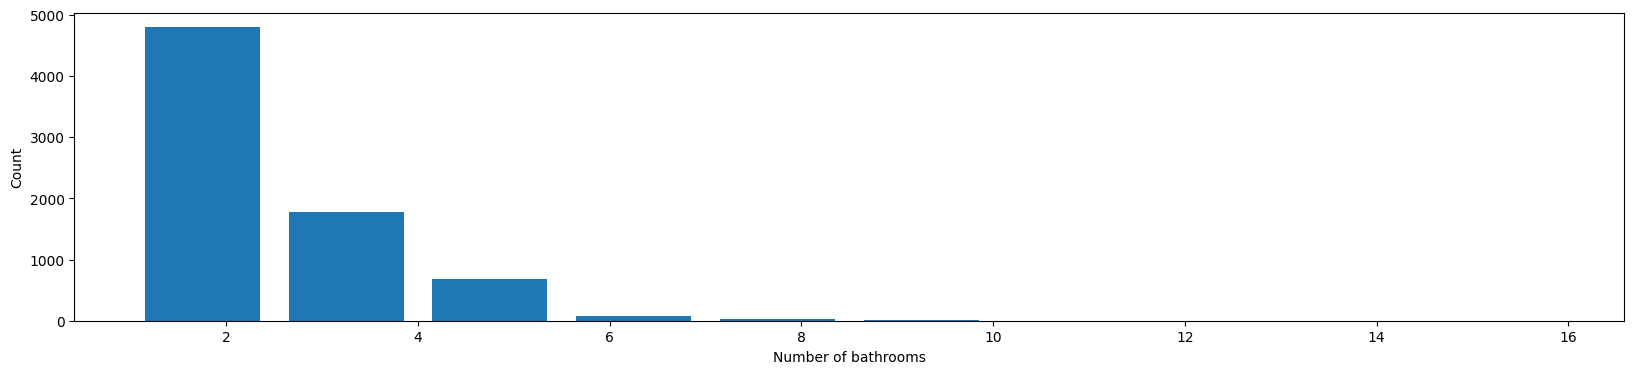

In [50]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [51]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


#### Again the business manager has a conversation with you (data scientist) 
##### that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom,
#### you will have total bath = total bed + 1 max.
#### Anything above that is an outlier or a data error and can be removed

In [52]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [53]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7298, 7)

In [54]:
df9.head(2)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
341,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2474,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667


In [55]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,BHK
341,Devarachikkanahalli,1250.0,2.0,40.0,2
2474,Devarachikkanahalli,1200.0,2.0,83.0,2
5030,Devarachikkanahalli,1170.0,2.0,40.0,2


## Use One Hot Encoding For Location

In [56]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
341,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2474,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5030,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
df10[df10['location'] == 'other'].head()


,location,total_sqft,bath,price,BHK
18,other,2770.0,4.0,290.00,3
24,other,510.0,1.0,25.25,1
42,other,600.0,1.0,38.00,1
57,other,1500.0,2.0,185.00,2
60,other,4395.0,3.0,240.00,3


In [58]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2474,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5030,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5771,Devarachikkanahalli,1425.0,2.0,65.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6591,Devarachikkanahalli,947.0,2.0,43.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2474,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5030,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5771,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6591,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Build a Model Now...

In [60]:
df12.shape

(7298, 244)

In [61]:
X = df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,1250.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2474,1200.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5030,1170.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5771,1425.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6591,947.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
X.shape

(7298, 243)

In [63]:
y = df12.price
y.head()

341     40.0
2474    83.0
5030    40.0
5771    65.0
6591    43.0
Name: price, dtype: float64

In [64]:
len(y)

7298

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [66]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7888694460122578

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83601339, 0.86707891, 0.852187  , 0.80862514, 0.80500726,
       0.863137  , 0.81328583, 0.84904942, 0.88678603, 0.8248652 ,
       0.87785754, 0.83434448, 0.85021706, 0.84852433, 0.83965979,
       0.84640264, 0.87357373, 0.80540381, 0.85205796, 0.81084244])

# model is stable

## This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. 
## We will use GridSearchCV for this purpose

# Find best model using GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {'model': LinearRegression(),'params': {'fit_intercept': [True, False],'positive': [True, False]}},
        'lasso':             {'model': Lasso(),'params': {'alpha': [0.1, 1, 2],'selection': ['cyclic', 'random']}},
        'decision_tree':     {'model': DecisionTreeRegressor(),
        'params':            {'criterion': ['squared_error', 'friedman_mse'],'splitter': ['best', 'random']}}}

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(
            config['model'],
            config['params'],
            cv=cv,
            scoring='r2'
        )
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores)

find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.833834,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.781596,"{'alpha': 0.1, 'selection': 'random'}"
2,decision_tree,0.751272,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


#  Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Test the model for few properties

In [69]:
def predict_price(location,sqft,bath,BHK):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [70]:
predict_price('1st Phase JP Nagar',100, 2, 2)

np.float64(22.7836988802796)

In [71]:
predict_price('Indira Nagar',10000, 3, 3)

np.float64(848.1929117749573)

## Predictions sanity check

In [72]:
y_pred = lr_clf.predict(X_test)

errors = y_test - y_pred
abs_error = np.abs(errors)


In [73]:
analysis_df = X_test.copy()
analysis_df['actual_price'] = y_test.values
analysis_df['predicted_price'] = y_pred
analysis_df['abs_error'] = abs_error

analysis_df.head()


,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,actual_price,predicted_price,abs_error
11071,1650.0,2.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,140.00,130.439746,9.560254
377,451.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,29.90,-14.014024,43.914024
4695,1070.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,45.00,35.918565,9.081435
557,525.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,27.25,8.797667,18.452333
9574,2774.0,4.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,197.00,208.686569,11.686569


In [74]:
analysis_df['price_bucket'] = pd.cut(
    analysis_df['actual_price'],
    bins=[0, 50, 100, 200, 500, 1000],
    labels=['low', 'mid', 'upper-mid', 'high', 'luxury']
)

analysis_df.groupby('price_bucket')['abs_error'].mean()


price_bucket
low           10.150915
mid           11.948165
upper-mid     20.513620
high          61.664690
luxury       199.250079
Name: abs_error, dtype: float64